In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as grid
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import importlib as imp
import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from fit_funcs import *
import costfun.costfun as cost
import utils.figures as fig_help

imp.reload(fig_help)

import latex
import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['text.usetex'] = True
latex_engine = 'pdflatex'
latex_elements = {
    'extrapackages': r'\usepackage{physics}',
    'extrapackages': r'\usepackage{amsmath}'
}
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)


%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:120])
colors_ls_cyc = itertools.cycle(colors_ls)
markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists
from filesystem import *
from entropy import page

USE_SYMMETRIES = False
BOUNDARY_COND = 'PBC'

base_dir = "../results/" + ("symmetries/" if USE_SYMMETRIES else "disorder/") + BOUNDARY_COND + '/'
maks_data = '/Users/rafal.swietek/Library/CloudStorage/CloudMounter-RafałŚwiętek/Shared with me/Python/Colab/ProjectsData/2023_Integrable_XYZ_XXZ/DATA/RAW/SUSY/XYZ_M/'

print(base_dir)
print(log_fit2(20, 0.9))


/Users/rafal.swietek/Projects/QHamSolver/XYZ/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
../results/disorder/PBC/
2.696159046198592


[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.
 14.5 15. ]


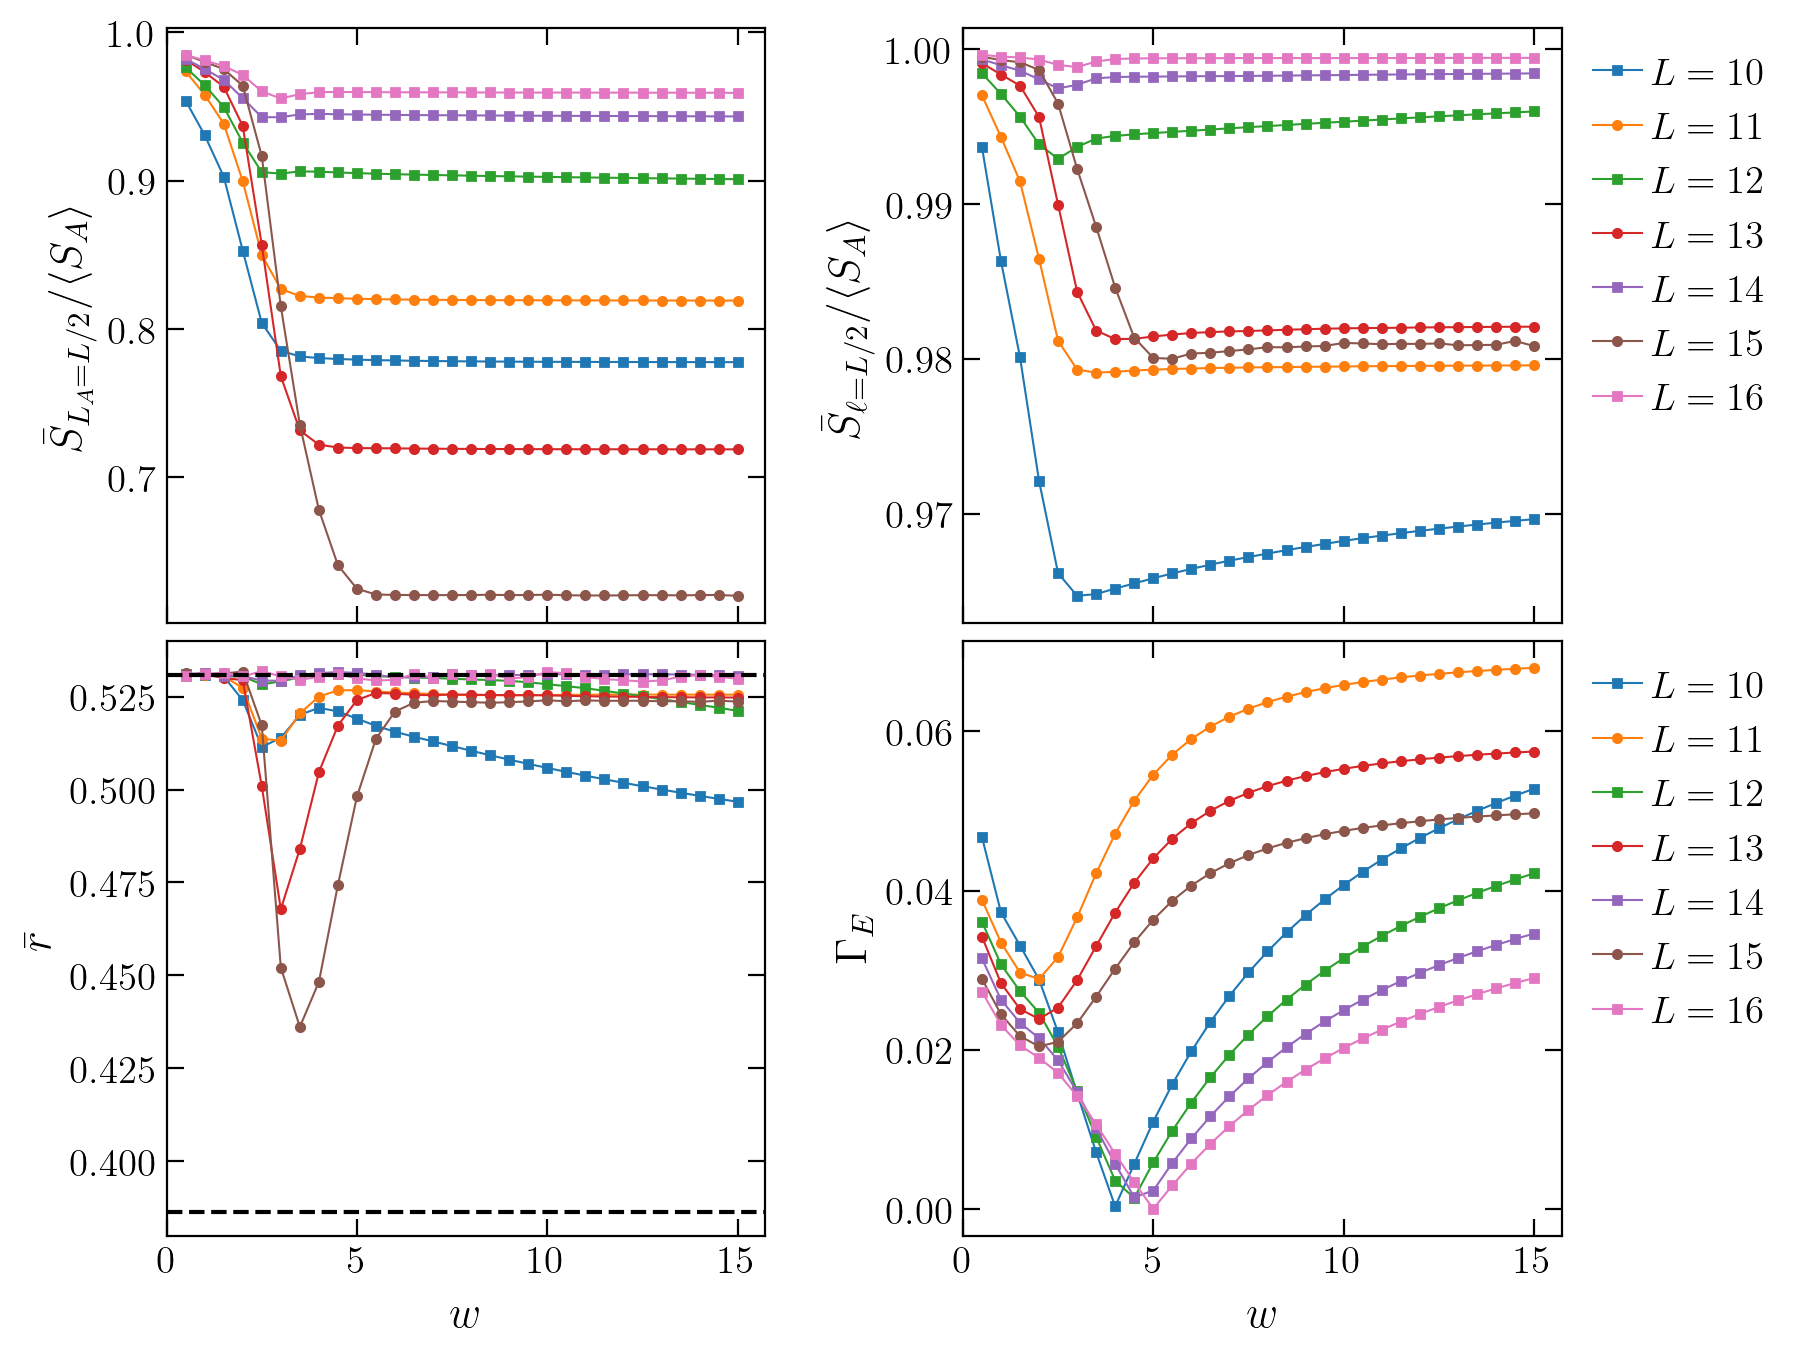

In [8]:

J1=1.0
d1=-0.48
e1=0.2
hx=0.0

w_vals = np.linspace(0.5, 15, 30)
print(w_vals)
fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(9,8), dpi = 200, sharex=True)

axis = np.array(axis).flatten()
nu = 500
def frac(dim):
    return nu if nu > 1 else int(dim * nu)

alfa = 0.0

for L in np.arange(10, 17, 1):
    LA = L // 2

    folder = f'collected data/nu={nu}/'
    os.makedirs(folder, exist_ok=True)
    name1 = folder + f'gap_ratio_L={L},J1={J1},e1={e1},d1={d1},hx={hx}.npy'
    name2 = folder + f'entropy_L={L},J1={J1},e1={e1},d1={d1},hx={hx}_LA={LA}.npy'
    name3 = folder + f'entropy_site_L={L},J1={J1},e1={e1},d1={d1},hx={hx}_l={LA}.npy'
    name4 = folder + f'gaussianity_L={L},J1={J1},e1={e1},d1={d1},hx={hx}.npy'
    if exists(name1) and exists(name2) and exists(name3) and exists(name4):
        with open(name1, 'rb') as file:   gap_ratio     = np.load(file, allow_pickle=True)
        with open(name2, 'rb') as file:   entropy       = np.load(file, allow_pickle=True)
        with open(name3, 'rb') as file:   entropy_site  = np.load(file, allow_pickle=True)
        with open(name4, 'rb') as file:   gaussianity   = np.load(file, allow_pickle=True)
    else:
        entropy = np.zeros((w_vals.size))
        entropy_site = np.zeros((w_vals.size))
        gap_ratio = np.zeros((w_vals.size))
        gaussianity = np.zeros((w_vals.size))
        for ii, w in enumerate(w_vals):
            name = base_dir + 'Entropy/Eigenstate/' + info_dis(L=L, J1=J1, eta1=e1, delta1=d1, hx=hx, w=w) + '.hdf5'
            #print(name)
            if exists(name):
                with h5py.File(name, "r") as file:
                    energies = np.array(file.get('mean energies'))
                    realis = np.array(file.get('realisations'))
                    
                    # print(L, w, realis)
                    dim = energies.size
                    num = frac(dim)

                    E_av = np.mean(energies)
                    index_meanE = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))
                    
                    my_min = int(index_meanE - num / 2)
                    if my_min < 0: my_min = 0;  

                    my_max = int(index_meanE + num / 2) 
                    if my_max >= dim: my_max = dim

                    sample1 = np.array(file.get('entropies'))[LA]
                    sample2 = np.array(file.get('single_site_entropy'))[LA]

                    ratio = np.array(file.get('gap ratio 500'))
                    # ratio = np.array(file.get('gap ratio D_2'))
                    gauss = np.array(file.get('gaussianity'))
                    if num < dim and my_min > 0 and my_max < dim:
                        sample1 = sample1[my_min : my_max]
                        sample2 = sample2[my_min : my_max]
                        # ratio   = ratio[my_min : my_max]
                    
                    entropy[ii] = np.mean(sample1)
                    entropy_site[ii] = np.mean(sample2)
                    # gap_ratio[ii] = np.mean(ratio)
                    gap_ratio[ii] = (ratio)
                    gaussianity[ii] = (gauss)
            else:
                print(name)


        with open(name1, 'wb') as file:   np.save(file, np.array(gap_ratio),    allow_pickle=True)
        with open(name2, 'wb') as file:   np.save(file, np.array(entropy),      allow_pickle=True)
        with open(name3, 'wb') as file:   np.save(file, np.array(entropy_site), allow_pickle=True)
        with open(name4, 'wb') as file:   np.save(file, np.array(gaussianity), allow_pickle=True)

    wx = w_vals

    mar = 'o' if L % 2 else's'
    axis[0].plot(wx/L**alfa, entropy / page(LA, L - LA), marker=mar, markersize=3, lw=0.75, label=r"$L=%d$"%L)
    axis[1].plot(wx/L**alfa, entropy_site / page(1, L - 1), marker=mar, markersize=3, lw=0.75, label=r"$L=%d$"%L)
    axis[2].plot(wx/L**alfa, gap_ratio, marker=mar, markersize=3, lw=0.75, label=r"$L=%d$"%L)
    axis[3].plot(wx/L**alfa, np.abs(gaussianity-np.pi/2), marker=mar, markersize=3, lw=0.75, label=r"$L=%d$"%L)


axis[2].set_ylim(0.38,0.54)
axis[2].axhline(y=0.3863, ls='--', color='black')
axis[2].axhline(y=0.5307, ls='--', color='black')

# axis[0].set_ylim(1 / L**(b - 1),3 / L**(b - 1))
axis[0].set_xlim(0, None)
axis[1].set_xlim(0, None)
# axis[idx2][idx1].set_xlim(0.0,2)

xlab = r"$w$"
fig_help.set_plot_elements(axis[0], ylabel=r"$\bar{S}_{L_A=L/2} / \langle S_A\rangle$", xlabel=xlab, font_size=14, set_legend=False)
fig_help.set_plot_elements(axis[1], ylabel=r"$\bar{S}_{\ell=L/2} / \langle S_A\rangle$", xlabel=xlab, font_size=14, set_legend=False)
fig_help.set_plot_elements(axis[2], ylabel=r"$\bar r$", xlabel=xlab, font_size=14, set_legend=False)
fig_help.set_plot_elements(axis[3], ylabel=r"$\Gamma_E$", xlabel=xlab, font_size=14, set_legend=False)
axis[1].legend(frameon=0, fontsize=14, loc='upper right', ncol=1, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(1.4, 1.01))
axis[3].legend(frameon=0, fontsize=14, loc='upper right', ncol=1, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(1.4, 1.01))



fig.subplots_adjust(wspace = 0.33, hspace=0.03)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
  0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
  0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
  0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
  0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667]
 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
  0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
 [0.125  

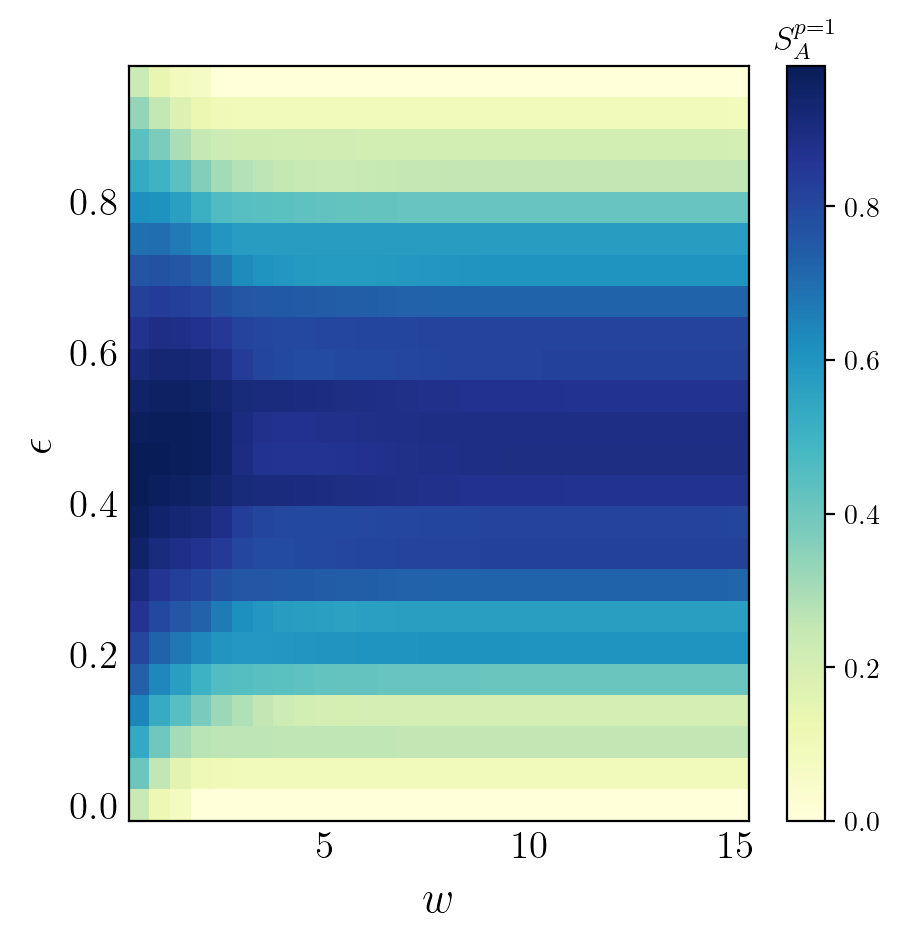

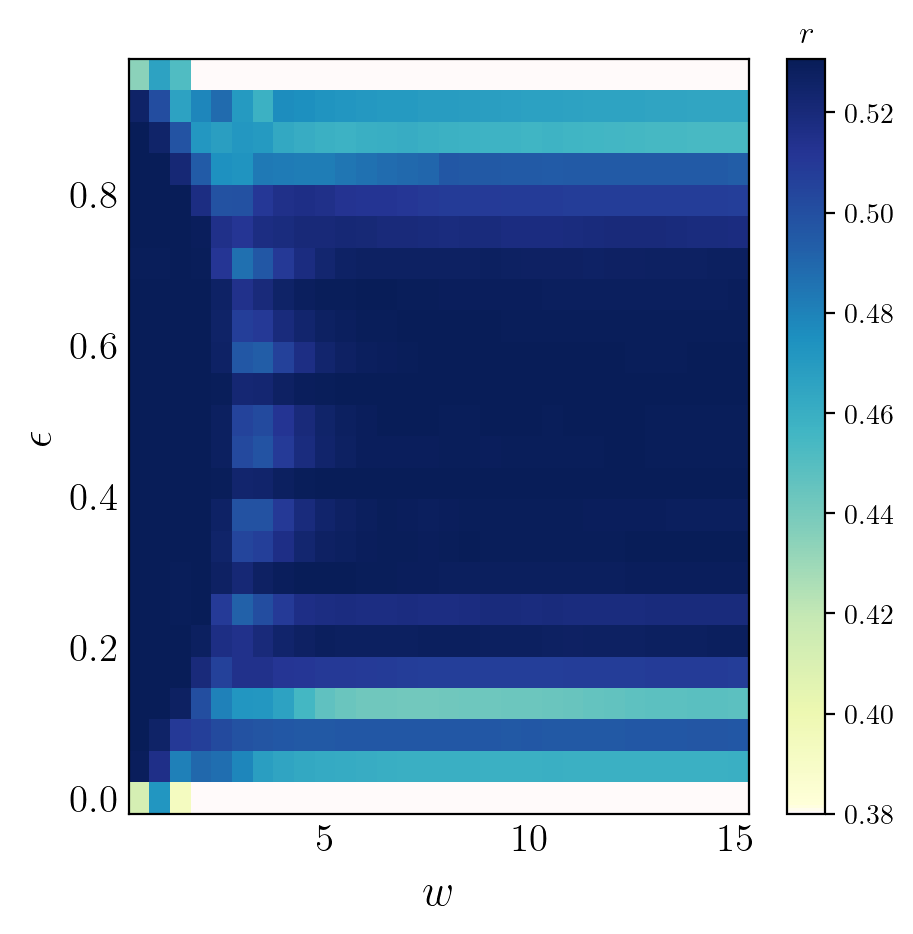

In [16]:

markers = itertools.cycle(markers_ls)


L=16

fig1, axis1 = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)
fig2, axis2 = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)
axis = [axis1, axis2]


w_vals = np.linspace(0.5, 15, 30)
J1=1.0
d1=-0.48
e1=0.2
hx=0.0

sub_sizes = np.arange(0, L+1)

density = np.zeros((sub_sizes.size, w_vals.size))

def frac(dim):
    return 200

LA = L // 2
energy_density = None
entropy_density = []
gap_ratio_density = []
for ii, w in enumerate(w_vals):
    name = base_dir + 'Entropy/Eigenstate/' + info_dis(L=L, J1=J1, eta1=e1, delta1=d1, hx=hx, w=w) + '.hdf5'
    if exists(name):
        with h5py.File(name, "r") as file:
            energy_density = np.array(file.get('bins'))[:-1]
            S_dens = np.array(file.get('entropy density'))[LA]
            gap_ratio = np.array(file.get('gap ratio density'))
            
            entropy_density.append(S_dens / page(LA, L - LA))  
            gap_ratio_density.append(gap_ratio)
    else:
        entropy_density.append(np.zeros(24))
        gap_ratio_density.append(np.zeros(24))
        print(name)

energy_density = np.array(energy_density)
entropy_density = np.array(entropy_density)
gap_ratio_density = np.array(gap_ratio_density)

disorder = np.array([w_vals for _ in entropy_density])

white = plt.get_cmap('seismic', 100)(0.5*np.ones(1))
upper = plt.get_cmap('YlGnBu', 100)(np.linspace(0.0, 1.0, 100))
colors = np.vstack((upper))  

mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

X, Y = np.meshgrid(w_vals , (energy_density))
print(Y)

p = axis1.pcolormesh(X, Y, np.transpose(entropy_density), shading='nearest', cmap=mymap)#, norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=1.0))
fig_help.set_plot_elements(axis1, ylabel=r"$\epsilon$", xlabel=r"$w$", font_size=14, set_legend=False, yscale = 'linear')
# axis1.set_title(r"$L=%d, N=%d, \gamma=%.2f$"%(L, N, gamma), fontsize=16)
clb = fig1.colorbar(p)
clb.ax.set_title(r"$S^{p=1}_A$")

colors = np.vstack((white, upper))  
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

p = axis2.pcolormesh(X, Y, np.transpose(gap_ratio_density), shading='nearest', cmap=mymap, vmin=0.38, vmax=0.5307)
fig_help.set_plot_elements(axis2, ylabel=r"$\epsilon$", xlabel=r"$w$", font_size=14, set_legend=False, yscale = 'linear')
clb2 = fig2.colorbar(p)
clb2.ax.set_title(r"$r$")

# axis.xaxis.set_minor_locator(plt.NullLocator())
# axis.yaxis.set_minor_locator(plt.NullLocator())

#legend = axis.legend(frameon=1, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(0.0,1.0), facecolor="gray")
plt.show()

(32768,)
(32768,)
(32768,)
(32768,)
(32768,)


Text(0.5, 1.0, '$\\nu=1,\\quad L=15$')

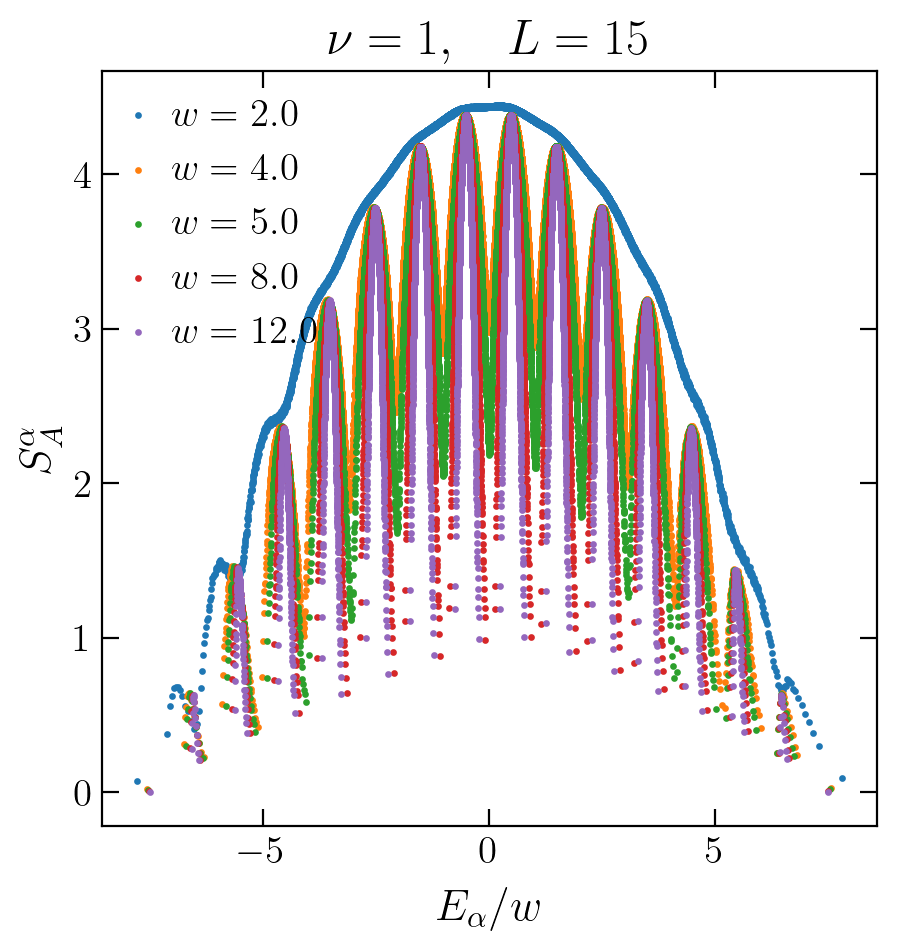

In [14]:

L=15

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

J1=1.0
d1=-0.48
e1=0.2
hx=0.0
LA = L//2

nu = 1.0
def frac(dim):
    return nu if nu > 1 else (dim if nu == 1.0 else int(dim * nu) )

for w in [2.0, 4.0, 5.0, 8.0, 12]:
    name = base_dir + 'Entropy/Eigenstate/' + info_dis(L=L, J1=J1, eta1=e1, delta1=d1, hx=hx, w=w) + '.hdf5'
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('mean energies'))
            dim = E.size
            num = frac(dim)

            E_av = np.mean(E)
            index_meanE = min(range(len(E)), key=lambda i: abs(E[i] - E_av))
            
            my_min = int(index_meanE - num / 2)
            if my_min < 0 or num == dim: my_min = 0;  

            my_max = int(index_meanE + num / 2) 
            if my_max >= dim or num == dim: my_max = dim

            S = np.array(file.get('entropies'))[LA][my_min : my_max]
            E = E[my_min : my_max]
            print(E.shape)
    else:
        print(name)

    axis.scatter(E / w, S, s=2, label=r"$w=%.1f$"%w)

fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha/w$", font_size=14, set_legend=True)
axis.legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.03,1.01))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis.set_title(r"$\nu=%g$"%nu, fontsize=18)
axis.set_title(r"$\nu=%g,\quad L=%g$"%(nu,L), fontsize=18)

(1024,)
(2048,)
(4096,)
(8192,)
(16384,)
(32768,)
(65536,)


Text(0.5, 1.0, '$\\nu=1,\\quad w=5$')

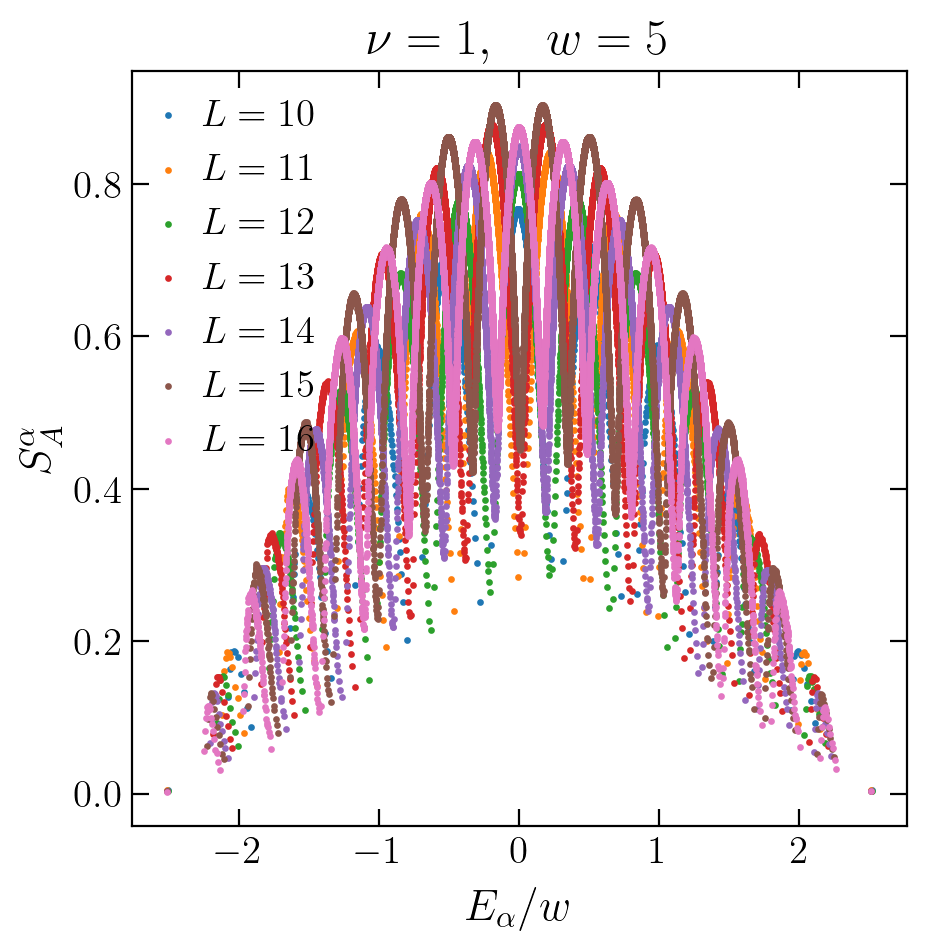

In [15]:

L=16

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

J1=1.0
d1=-0.48
e1=0.2
hx=0.0
w=5.0


nu = 1.0
def frac(dim):
    return nu if nu > 1 else (dim if nu == 1.0 else int(dim * nu) )

for L in np.arange(10, 17,1):
    LA = L//2
    name = base_dir + 'Entropy/Eigenstate/' + info_dis(L=L, J1=J1, eta1=e1, delta1=d1, hx=hx, w=w) + '.hdf5'
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('mean energies'))
            dim = E.size
            num = frac(dim)

            E_av = np.mean(E)
            index_meanE = min(range(len(E)), key=lambda i: abs(E[i] - E_av))
            
            my_min = int(index_meanE - num / 2)
            if my_min < 0 or num == dim: my_min = 0;  

            my_max = int(index_meanE + num / 2) 
            if my_max >= dim or num == dim: my_max = dim

            S = np.array(file.get('entropies'))[LA][my_min : my_max] / (LA * np.log(2))
            E = E[my_min : my_max]
            print(E.shape)
    else:
        print(name)

    axis.scatter(E / L, S, s=2, label=r"$L=%d$"%L)

fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha/w$", font_size=14, set_legend=True)
axis.legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.03,1.01))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis.set_title(r"$\nu=%g,\quad w=%g$"%(nu,w), fontsize=18)